In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import mglearn
import set_matplotlib_hangul
from sklearn.model_selection import train_test_split

%matplotlib inline

Hangul OK in MAC!!


In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


In [5]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


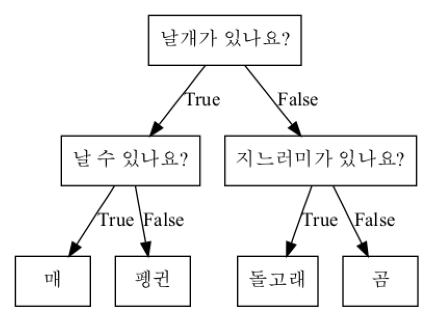

In [7]:
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

from imageio import imread
import matplotlib.pyplot as plt


def plot_animal_tree(ax=None):
    import graphviz
    plt.figure(dpi=100)
    if ax is None:
        ax = plt.gca()
    mygraph = graphviz.Digraph(node_attr={'shape': 'box'},
                               edge_attr={'labeldistance': "10.5"},
                               format="png")
    mygraph.node("0", "날개가 있나요?")
    mygraph.node("1", "날 수 있나요?")
    mygraph.node("2", "지느러미가 있나요?")
    mygraph.node("3", "매")
    mygraph.node("4", "펭귄")
    mygraph.node("5", "돌고래")
    mygraph.node("6", "곰")
    mygraph.edge("0", "1", label="True")
    mygraph.edge("0", "2", label="False")
    mygraph.edge("1", "3", label="True")
    mygraph.edge("1", "4", label="False")
    mygraph.edge("2", "5", label="True")
    mygraph.edge("2", "6", label="False")
    mygraph.render("tmp")
    ax.imshow(imread("tmp.png"))
    ax.set_axis_off()


plot_animal_tree()

#### 결정 트리 만들기

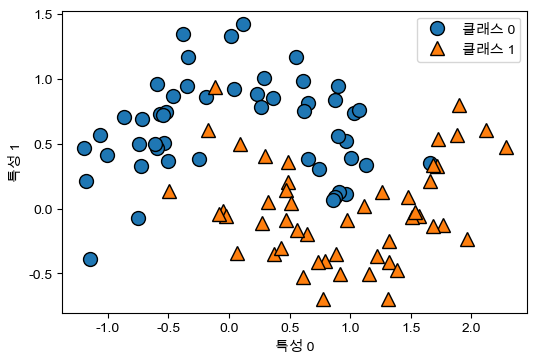

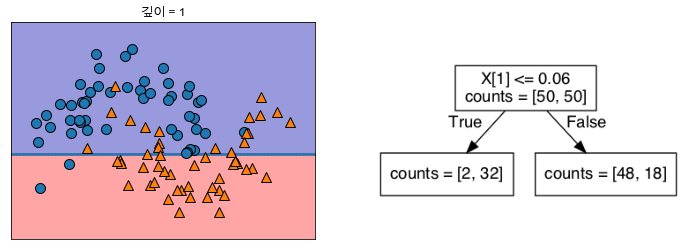

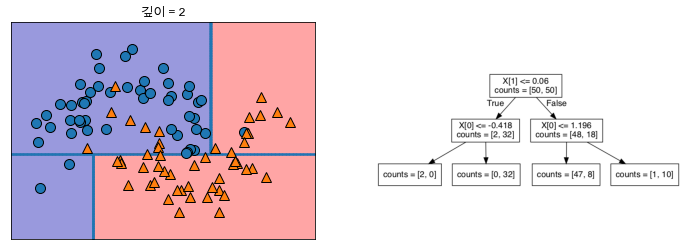

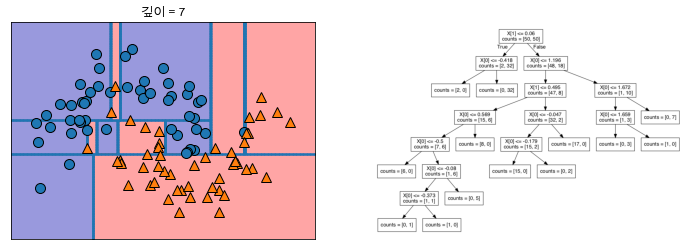

In [14]:
mglearn.plots.plot_tree_progressive()

#### 결정 트리의 복잡도 제어하기

In [15]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


In [16]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


#### 결정 트리 분석

In [17]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

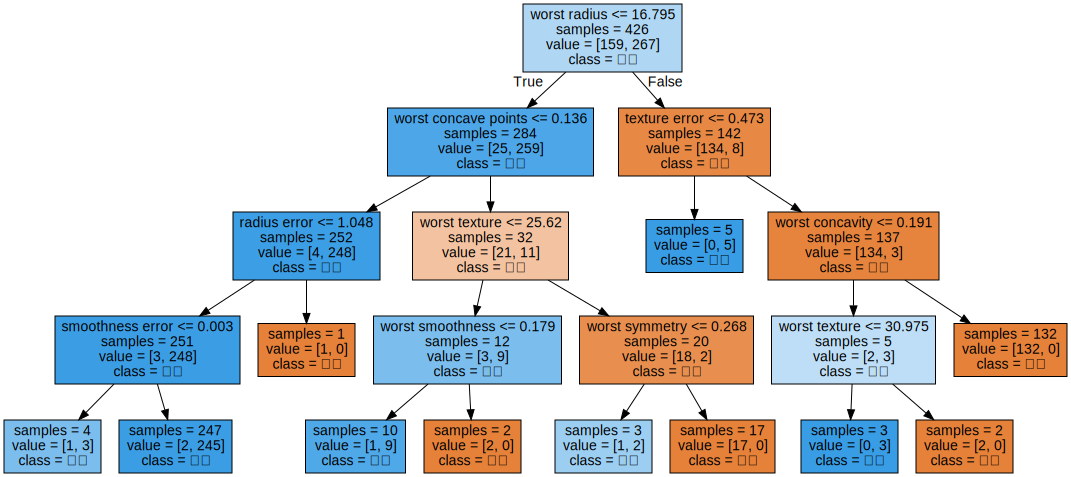

In [18]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

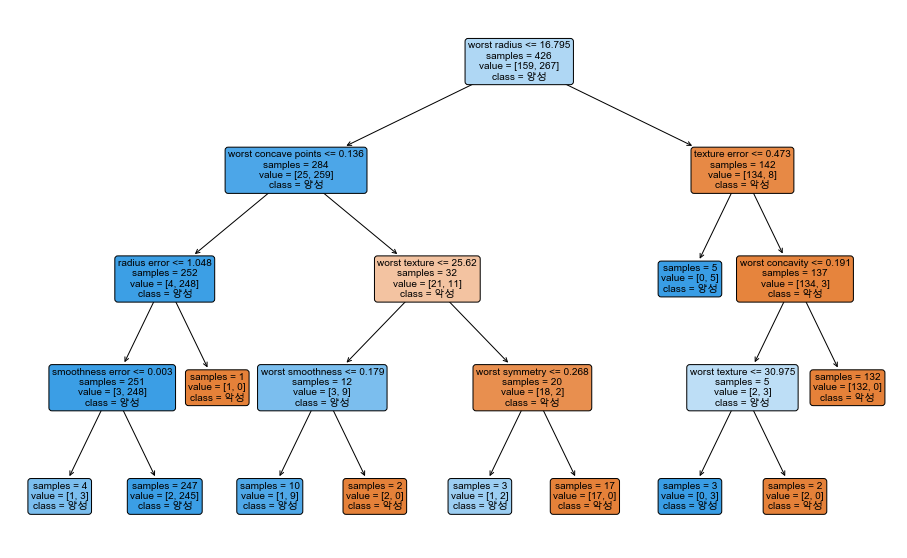

In [22]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,10))
plot_tree(tree, class_names=["악성", "양성"], feature_names=cancer.feature_names,
         impurity=False, filled=True, rounded=True, fontsize=10)
plt.show()

#### 트리의 특성 중요도

In [23]:
print("특성 중요도:\n", tree.feature_importances_)

특성 중요도:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


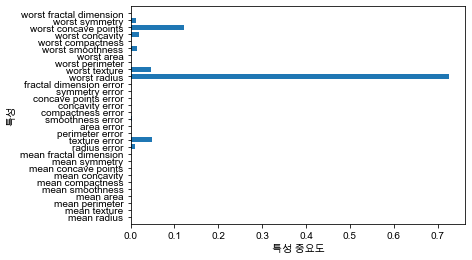

In [24]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


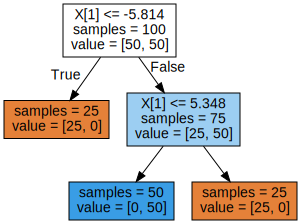

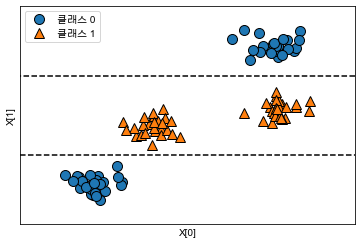

In [25]:
mglearn.plots.plot_tree_not_monotone()

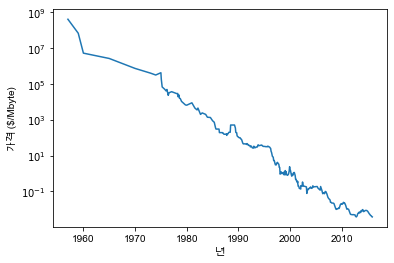

In [30]:
# 로그 스케일로 그린 램 가격 동향
import os
ram_prices = pd.read_csv("ram_price.csv")

plt.yticks(fontname = "DejaVu Sans") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")
plt.show()

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용합니다
X_train = data_train.date.to_numpy()[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다
X_all = ram_prices.date.to_numpy()[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌립니다
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

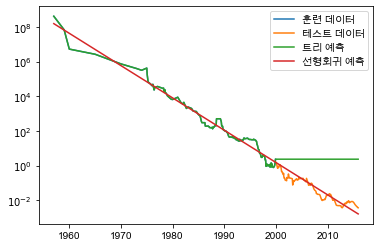

In [35]:
plt.yticks(fontname = "DejaVu Sans") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.legend()
plt.show()

#### 장단점과 매개변수

#### 판다스 데이터 프레임 연동

In [36]:
tree.fit(data_train[['date']], y_train)

print('특성 개수:', tree.n_features_in_)
print('특성 이름:', tree.feature_names_in_)

특성 개수: 1
특성 이름: ['date']


### 결정 트리의 앙상블
#### 랜덤 포레스트
##### 랜덤 포레스트 구축
##### 랜덤 포레스트 분석

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

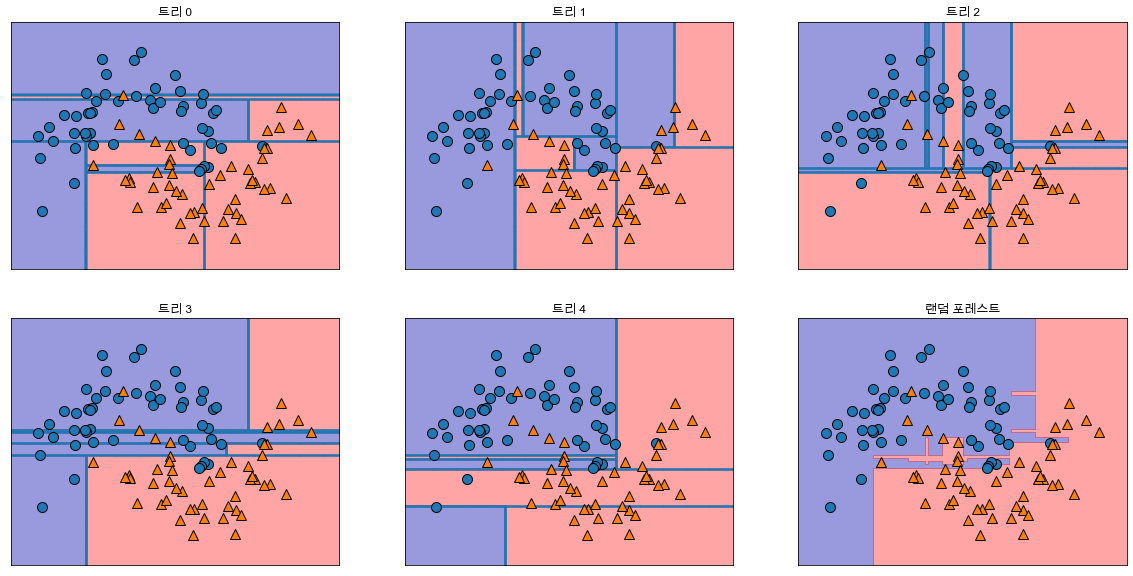

In [38]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


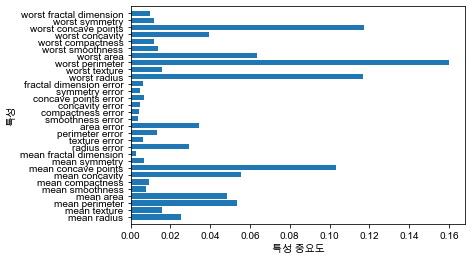

In [40]:
plot_feature_importances_cancer(forest)

##### 장단점과 매개변수

#### 그래디언트 부스팅 회귀 트리
- 트리의 오차를 보완하는 방식의 순차적으로 트리를 만듬
- 무작위성이 없다, 예측이 빠르며, 메모리를 적게사용

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


In [42]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972


In [50]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965


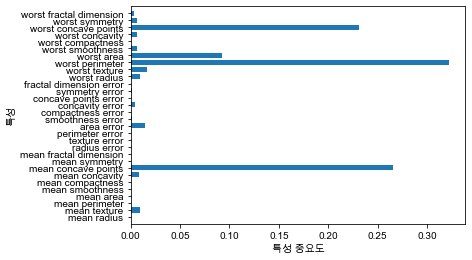

In [51]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)